In [1]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connfile = '../data_in/connectome_partial_correlation.csv'
mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

100%|██████████| 1000/1000 [01:17<00:00, 12.88it/s]


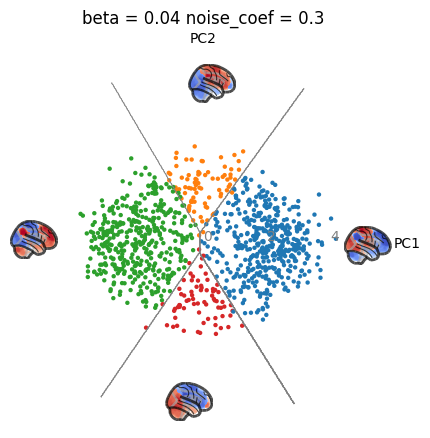

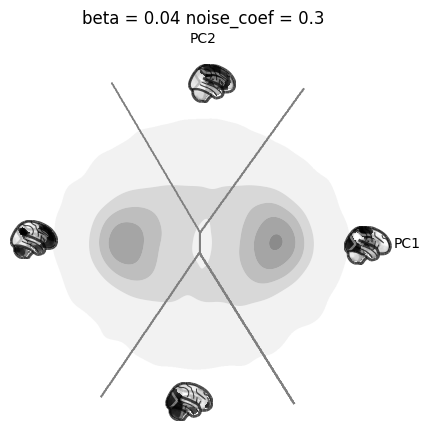

100%|██████████| 1000/1000 [01:20<00:00, 12.35it/s]


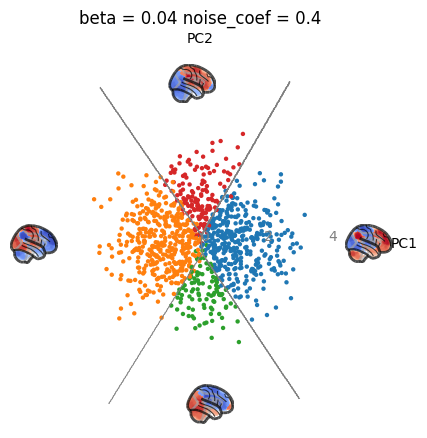

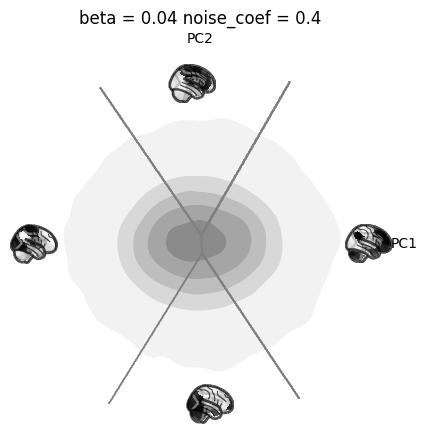

100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


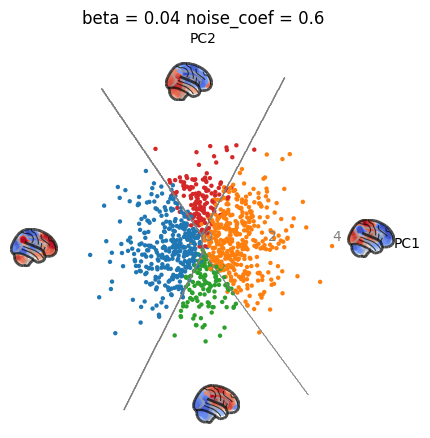

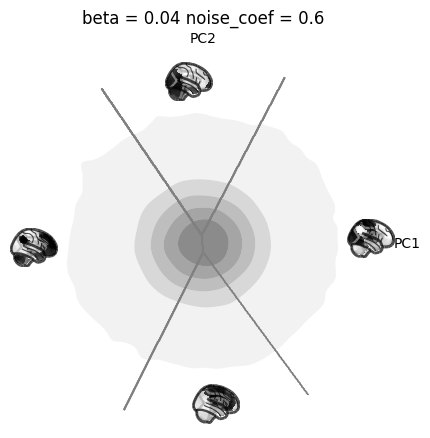

100%|██████████| 1000/1000 [01:16<00:00, 13.02it/s]


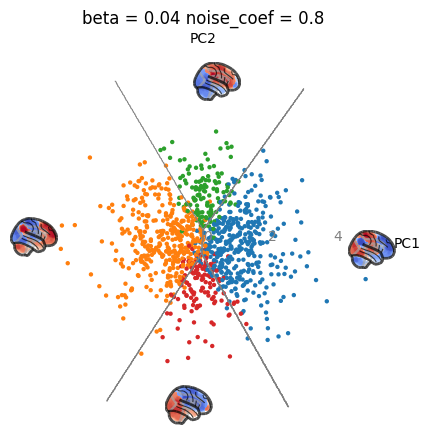

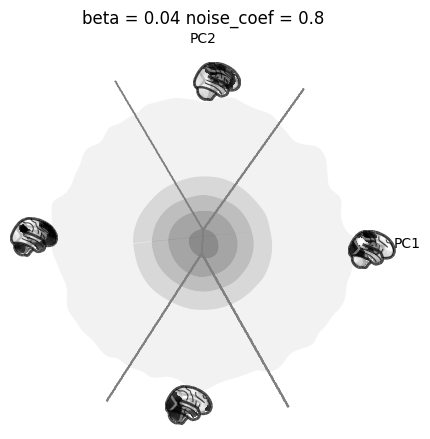

100%|██████████| 1000/1000 [01:18<00:00, 12.80it/s]


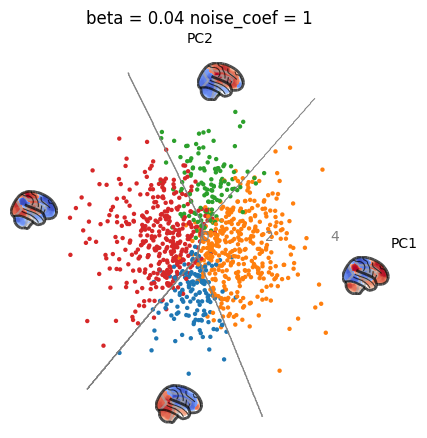

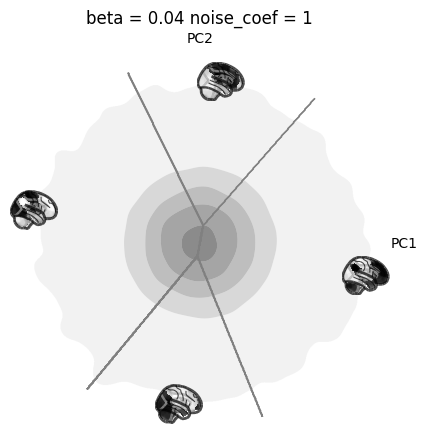

In [13]:
for beta, noise_coef in [(0.04, 0.3), (0.04, 0.4), (0.04, 0.6), (0.04, 0.8), (0.04, 1)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=100000, beta=beta)
    hopfield_embedding = analysis.create_embeddings(simresults, attractor_sample=1000)

    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    ax = hopfield_embedding.plot(hopfield_embedding.state_sample, s=10,
                            c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                            alpha=1, regimes_fill_kwargs=dict(alpha=0),
                            attractor_plot_type='glassbrain')
    ax.set_title('beta = ' + str(beta) + ' noise_coef = ' + str(noise_coef))
    ax.grid(False)
    plt.show()
    
    # black and white contourf
    ax = hopfield_embedding.plot(simresults.states, plot_type='contourf',
                            density_bins=1000, density_sigma=20, levels=4, alpha=0.5, cmap='gray_r',
                            attractor_plot_type='glassbrain',
                            attractor_kwargs=dict(cmap='binary'),
                            regimes_fill_kwargs=dict(alpha=0.0),
                            regimes_contour_kwargs=dict(linewidths=1, colors='gray') 
                           )
    ax.set_title('beta = ' + str(beta) + ' noise_coef = ' + str(noise_coef))
    ax.set_yticks([])
    ax.xaxis.grid(False)
    plt.show()

100%|██████████| 100/100 [00:07<00:00, 12.66it/s]
/home/tspisak/src/connattractor/connattractor/analysis.py:191: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:191: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:191: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:191: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)


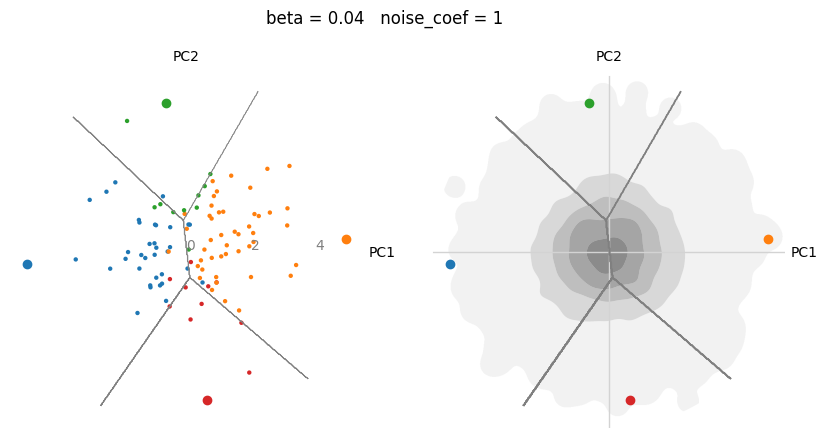

In [12]:
beta = 0.04
noise_coef = 1
simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=10000, beta=beta)
hopfield_embedding = analysis.create_embeddings(simresults, attractor_sample=100)

fig, ax = plt.subplots(ncols=2, subplot_kw=dict(polar=True), figsize=(10,5))
fig.suptitle("beta = " + str(beta) + "   noise_coef = " + str(noise_coef))

colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfield_embedding.plot(hopfield_embedding.state_sample, s=10, ax=ax[0],
                            c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                            alpha=1, regimes_fill_kwargs=dict(alpha=0),
                            attractor_plot_type='scatter')
ax[1].xaxis.grid(True, linewidth=1, color='lightgray')
ax[0].grid(False)
    
    # black and white contourf
hopfield_embedding.plot(simresults.states, plot_type='contourf', ax=ax[1],
                        density_bins=1000, density_sigma=20, levels=4, alpha=0.5, cmap='gray_r',
                        attractor_plot_type='scatter',
                        attractor_kwargs=dict(cmap='binary'),
                        regimes_fill_kwargs=dict(alpha=0.0),
                        regimes_contour_kwargs=dict(linewidths=1, colors='gray') 
                       )
ax[1].set_yticks([])
ax[1].xaxis.grid(True, linewidth=1, color='lightgray')
plt.show()

# todo:
- map states with low noise and high n, but without attractor calculation
- do the attractor calulcation for a random sample during embedding calculation
- make the attractor model based on that
- plot regimes non linearly (with heatmap?) rectangular grid, bigger than view, then set limits
